<h1 align="center">Image Partition</h1>
<h5 align="center">Using Laplacian.</h5>

## Framework

1. ***Construct the adjacency matrix of a planar graph***  


2. ***Construct the Laplacian***  


3. ***Compute the eigenvalues and eigenvectors of Laplacian***  

## Implementation

### 1. import libraries and display image

In [1]:
%pylab inline

import cv2
import math
from scipy import sparse
from scipy.sparse.linalg import eigsh

Populating the interactive namespace from numpy and matplotlib


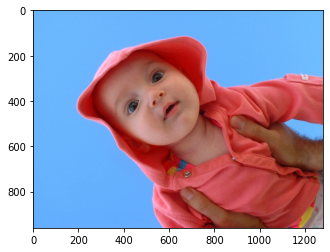

In [2]:
#read image
img = cv2.imread('images/baby.jpg')
img = img[:,:,::-1]

#normalize the RGB code
img = img/255

#show image
plt.imshow(img)
plt.show()

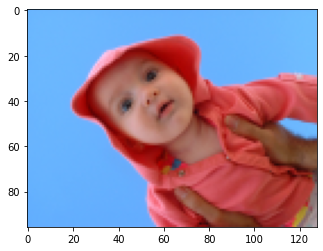

Size of figure:  96 * 128


In [18]:
#create a down-sampled version of image
scale = 10
imc = img[::scale,::scale,:]
imc = zeros(imc.shape)

for i in range(scale):
    for j in range(scale):
        imc += img[i::scale,j::scale,:]
imc = imc/(scale**2)

plt.imshow(imc)
plt.show()

#size
x, y, z = imc.shape
n = x*y
imcv = imc.reshape(n,z)
print('Size of figure: ', x,'*',y)

### 2. Set parameters

In [4]:
dim = 3    #dimension of the graph
c = 5      #number of eigenvector to compute

### 3. Construct adjacency matrix and Laplacian

In [5]:
ai=[]
aj=[]
av=[]

for xi in range(dim+1):
    for yi in range(dim+1-xi):
        if xi!=0 or yi!=0:
            tm1 = zeros((x,y))
            tm2 = zeros((x,y))
            tm1[:x-xi, :y-yi] = 1
            tm2[xi:, yi:] = 1
                             
            ind1 = argwhere(tm1)
            ind2 = argwhere(tm2)
            ind1 = ind1[:,0]*y+ind1[:,1]
            ind2 = ind2[:,0]*y+ind2[:,1]
                        
            difv = imcv[ind1,:]-imcv[ind2,:]
            dif = sum(difv*difv, axis=1)
            
            ai.extend(ind1)
            aj.extend(ind2)
            av.extend(dif)
            
            if xi*yi!=0:
                tm1 = zeros((x,y))
                tm2 = zeros((x,y))
                tm1[xi:, :y-yi] = 1
                tm2[:x-xi, yi:] = 1
                
                ind1 = argwhere(tm1)
                ind2 = argwhere(tm2)
                ind1 = ind1[:,0]*y+ind1[:,1]
                ind2 = ind2[:,0]*y+ind2[:,1]

                difv = imcv[ind1,:]-imcv[ind2,:]
                dif = sum(difv*difv, axis=1)

                ai.extend(ind1)
                aj.extend(ind2)
                av.extend(dif)
                
                
av = av/max(av)
av = exp(-av*100)

vals = sorted(av)
bottom = vals[int(size(vals)/150)]
av[av<bottom] = bottom

In [6]:
#sparse adjacency matrix
A = sparse.csr_matrix((av,(ai,aj)), shape=(n, n))
A = A + A.transpose()

In [7]:
si2 = np.array(1/sqrt(sum(A, axis=0)))

#sparse matrix with d^(-1/2) on its diagonal
di2 = sparse.dia_matrix((si2,0), shape=(n,n))

#laplacian
L = sparse.eye(n)-di2.dot(A).dot(di2)

### 3. Calculate eigenvalues and eigenvectors of Laplacian

In [8]:
eigv, eige = eigsh(L, c, which='SM')

### 4. Display cut using eigenvectors

***4.1. cut using 2nd eigv***

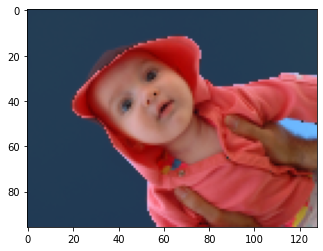

In [9]:
inde2 = argwhere(eige[:,1]<(sum(eige[:,1])/n))

imh = imcv
imh[inde2,:] /= 3
imh = imh.reshape(x,y,z)

plt.imshow(imh)
plt.show()

#matplotlib.image.imsave('2.jpg', imh)

***4.2. cut using 3rd eigv***

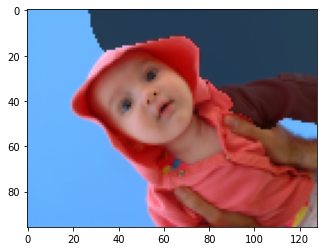

In [11]:
inde3 = argwhere(eige[:,2]>(sum(eige[:,2])/n)) 

imh = imcv
imh[inde3,:] /= 3
imh = imh.reshape(x,y,z)

plt.imshow(imh)
plt.show()

#matplotlib.image.imsave('3.jpg', imh)

***4.3. cut using 4th eigv***

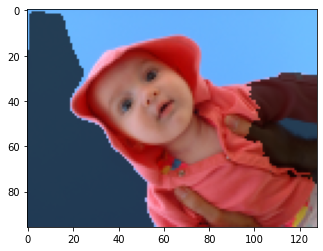

In [15]:
inde4 = argwhere(eige[:,3]>(sum(eige[:,4])/n))

imh = imcv
imh[inde4,:] /= 3
imh = imh.reshape(x,y,z)

plt.imshow(imh)
plt.show()

#matplotlib.image.imsave('4.jpg', imh)

***4.4. cut using 5th eigv***

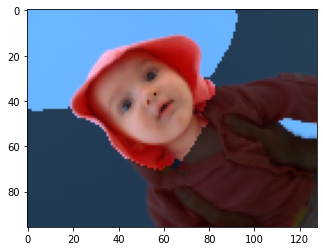

In [19]:
inde5 = argwhere(eige[:,4]<(sum(eige[:,4])/n))

imh = imcv
imh[inde5,:] /= 3
imh = imh.reshape(x,y,z)

plt.imshow(imh)
plt.show()

#matplotlib.image.imsave('5.jpg', imh)